In [1]:
import pandas as pd
import seaborn as sms
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("loan-train.csv")

In [3]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


[]

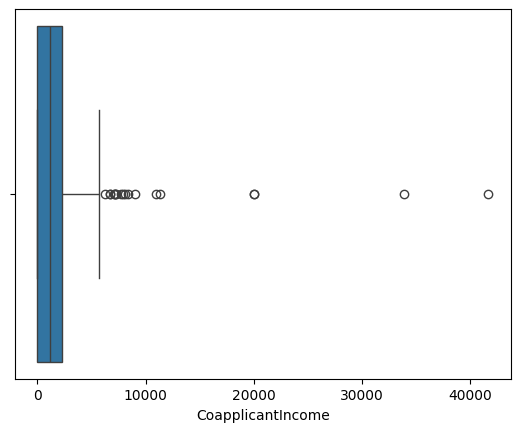

In [5]:
plt = sms.boxplot(x="CoapplicantIncome", data = dataset)
plt.plot()

In [6]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
IQR = q3 - q1
print(f"{IQR}")
min_range = float(q1 - 1.5*IQR)
max_range = float(q3 + 1.5*IQR)
min_range, max_range

2297.25


(-3445.875, 5743.125)

In [7]:
new_dataset = dataset[dataset["CoapplicantIncome"] <=max_range]

In [8]:
new_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


[]

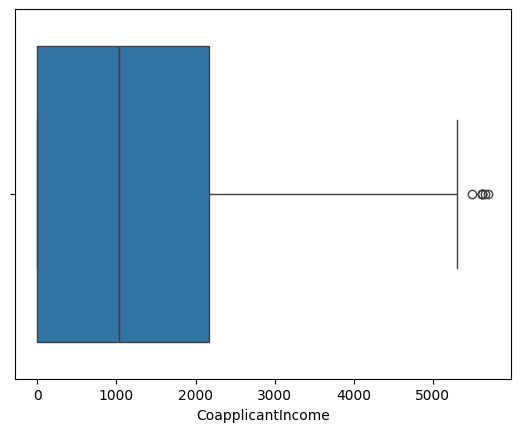

In [10]:
sms.boxplot(x="CoapplicantIncome", data=new_dataset)
plt.plot()

In [5]:
dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].mode()[0], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10932\4189613697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].mode()[0], inplace=True)


### Z-score

In [15]:
from sklearn.preprocessing import StandardScaler
sh = StandardScaler()
sh.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [17]:
dataset["Application_Income"] = pd.DataFrame(sh.transform(dataset[["ApplicantIncome"]]))

In [18]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Application_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [21]:
new_dataset = dataset[dataset["Application_Income"] < 3]
new_dataset.shape

(606, 14)

[]

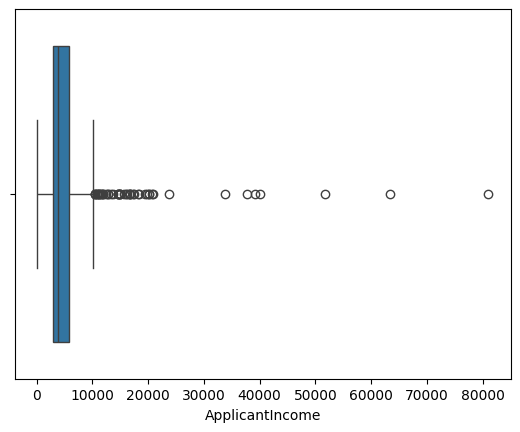

In [28]:

sms.boxplot(x="ApplicantIncome", data = dataset)
plt.plot()

[]

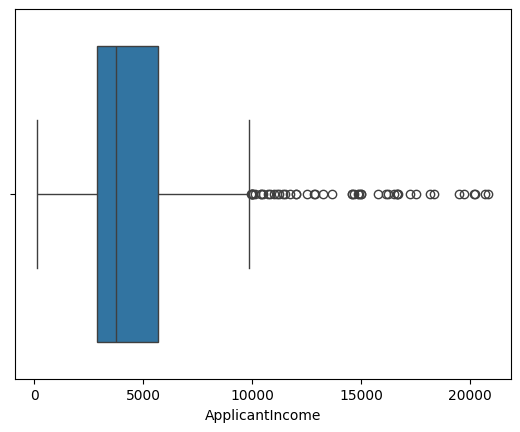

In [29]:

sms.boxplot(x="ApplicantIncome", data = new_dataset)
plt.plot()

### Min and Max (Normal Distrubution)

In [6]:
min_range = dataset["ApplicantIncome"].mean() - (3*dataset["ApplicantIncome"].std())
max_range = dataset["ApplicantIncome"].mean() + (3*dataset["ApplicantIncome"].std())
min_range, max_range

(np.float64(-12923.66573677391), np.float64(23730.584303549156))

In [7]:
new_dataset = dataset[dataset["ApplicantIncome"]<=max_range]
new_dataset.shape

(606, 13)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10932\4023703711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sms.distplot(new_dataset["ApplicantIncome"])


[]

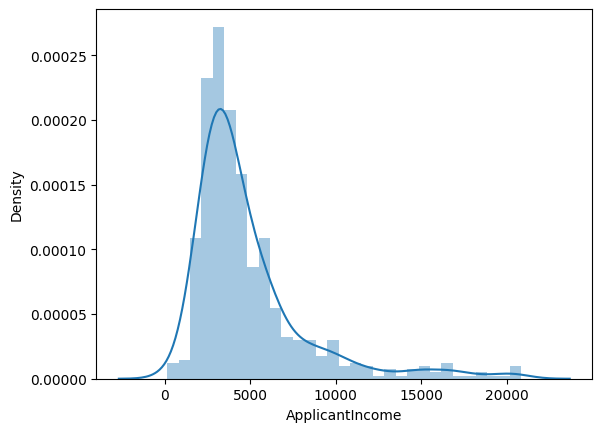

In [9]:
sms.distplot(new_dataset["ApplicantIncome"])
plt.plot()